# Import dependencies

In [1]:
#import all 
import sys, os
from pandas.io.parsers import read_csv
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import collections
import scipy

# Import dataframe

In [2]:
pathToData = '/Users/m.blotenburg/Documents/Projects/Mouse_Scartrace/Data_analysis/Scar_analysis'

In [3]:
#WTdata
WT = read_csv(pathToData + '/VAN2988_bam_countTables/raw_demultiplexed/WTbulk-5ng-35cyc-scars_000000000-C9YPM_S5/countTable/S5_countTable.csv',sep = ',', low_memory=False, index_col=(0,1,2,3))
WT = WT.loc[[idx for idx in WT.index if 'Unknown'!=idx]]
WT = WT.iloc[1:]
WT.columns = WT.columns.str.replace('WTbulk-5ng-35cyc-scars_000000000-C9YPM_S5_','WTbulk.')
WT.index.names = ['chrom','allele','site', 'scar']
       
WT.columns = pd.MultiIndex.from_tuples( [ (x.split('.',3)[0], x.split('.',3)[1]) for x in WT.columns] )
#WT.columns.names = ['gastruloid','cell']
WT = WT[sorted(WT.columns)]


In [4]:
WT.head()

WTbulk      \
                                                                     1  10   
chrom allele      site      scar                                             
12    129S1_SvImJ 114676845 WT                                     1.0 NaN   
                  114676846 WT                                     1.0 NaN   
                  114682729 114682733.D                          668.0 NaN   
                            114682733.D,114682734.D               19.0 NaN   
                            114682733.D,114682734.D,114682945.D    1.0 NaN   

                                                                             \
                                                                101 109 110   
chrom allele      site      scar                                              
12    129S1_SvImJ 114676845 WT                                  NaN NaN NaN   
                  114676846 WT                                  NaN NaN NaN   
                  114682729 114682733.D                         NaN NaN NaN   
                            114682733.D,114682734.D             NaN NaN NaN   
                            114682733.D,114682734.D,114682945.D NaN NaN NaN   

                                                                             \
                                                                115 116 118   
chrom allele      site      scar                                              
12    129S1_SvImJ 114676845 WT                                  NaN NaN NaN   
                  114676846 WT                                  NaN NaN NaN   
                  114682729 114682733.D                         NaN NaN NaN   
                            114682733.D,114682734.D             NaN NaN NaN   
                            114682733.D,114682734.D,114682945.D NaN NaN NaN   

                                                                        ...  \
                                                                119 120 ...   
chrom allele      site      scar                                        ...   
12    129S1_SvImJ 114676845 WT                                  NaN NaN ...   
                  114676846 WT                                  NaN NaN ...   
                  114682729 114682733.D                         NaN NaN ...   
                            114682733.D,114682734.D             NaN NaN ...   
                            114682733.D,114682734.D,114682945.D NaN NaN ...   

                                                                             \
                                                                 80  81  83   
chrom allele      site      scar                                              
12    129S1_SvImJ 114676845 WT                                  NaN NaN NaN   
                  114676846 WT                                  NaN NaN NaN   
                  114682729 114682733.D                         NaN NaN NaN   
                            114682733.D,114682734.D             NaN NaN NaN   
                            114682733.D,114682734.D,114682945.D NaN NaN NaN   

                                                                             \
                                                                 85  86  88   
chrom allele      site      scar                                              
12    129S1_SvImJ 114676845 WT                                  NaN NaN NaN   
                  114676846 WT                                  NaN NaN NaN   
                  114682729 114682733.D                         NaN NaN NaN   
                            114682733.D,114682734.D             NaN NaN NaN   
                            114682733.D,114682734.D,114682945.D NaN NaN NaN   

                                                                             \
                                                                 91  92  95   
chrom allele      site      scar                                              
12    129S1_SvImJ 114676845 WT       

In [5]:
#C5Data
C5bulk = read_csv(pathToData + '/VAN2988_bam_countTables/raw_demultiplexed/Clone5bulk-5ng-35cyc-scars_000000000-C9YPM_S6/countTable/S6_countTable.csv',sep = ',', low_memory=False, index_col=(0,1,2,3))
C5bulk = C5bulk.loc[[idx for idx in C5bulk.index if 'Unknown'!=idx]]
C5bulk = C5bulk.iloc[1:]
C5bulk.columns = C5bulk.columns.str.replace('Clone5bulk-5ng-35cyc-scars_000000000-C9YPM_S6_','C5bulk.')
C5bulk.index.names = ['chrom','allele','site', 'scar']
       
C5bulk.columns = pd.MultiIndex.from_tuples( [ (x.split('.',3)[0], x.split('.',3)[1]) for x in C5bulk.columns] )
C5bulk = C5bulk[sorted(C5bulk.columns)]



In [6]:
C5bulk.head()

C5bulk                  \
                                                         1 100 104 108 109   
chrom allele      site      scar                                             
12    129S1_SvImJ 114513426 WT                         NaN NaN NaN NaN NaN   
                  114513427 114513431.D                NaN NaN NaN NaN NaN   
                            114513431.D,114513432.D    NaN NaN NaN NaN NaN   
                            114513432.D                NaN NaN NaN NaN NaN   
                            114513432.D,114513433.D    NaN NaN NaN NaN NaN   

                                                                        ...  \
                                                    110 113 116 118 120 ...   
chrom allele      site      scar                                        ...   
12    129S1_SvImJ 114513426 WT                      NaN NaN NaN NaN NaN ...   
                  114513427 114513431.D             NaN NaN NaN NaN NaN ...   
                            114513431.D,114513432.D NaN NaN NaN NaN NaN ...   
                            114513432.D             NaN NaN NaN NaN NaN ...   
                            114513432.D,114513433.D NaN NaN NaN NaN NaN ...   

                                                                             \
                                                     79  82  83  86  91  92   
chrom allele      site      scar                                              
12    129S1_SvImJ 114513426 WT                      NaN NaN NaN NaN NaN NaN   
                  114513427 114513431.D             NaN NaN NaN NaN NaN NaN   
                            114513431.D,114513432.D NaN NaN NaN NaN NaN NaN   
                            114513432.D             NaN NaN NaN NaN NaN NaN   
                            114513432.D,114513433.D NaN NaN NaN NaN NaN NaN   

                                                                     
                                                     94  96  98  99  
chrom allele      site      scar                                     
12    129S1_SvImJ 114513426 WT                      NaN NaN NaN NaN  
                  114513427 114513431.D             NaN NaN NaN NaN  
                            114513431.D,114513432.D NaN NaN NaN NaN  
                            114513432.D             NaN NaN NaN NaN  
                            114513432.D,114513433.D NaN NaN NaN NaN  

[5 rows x 219 columns]

In [7]:
dfs_all = [WT, C5bulk]
data_all = dfs_all[0].join(dfs_all[1:],how='outer')

data = data_all[[('WTbulk', '1'),('C5bulk','2')]]



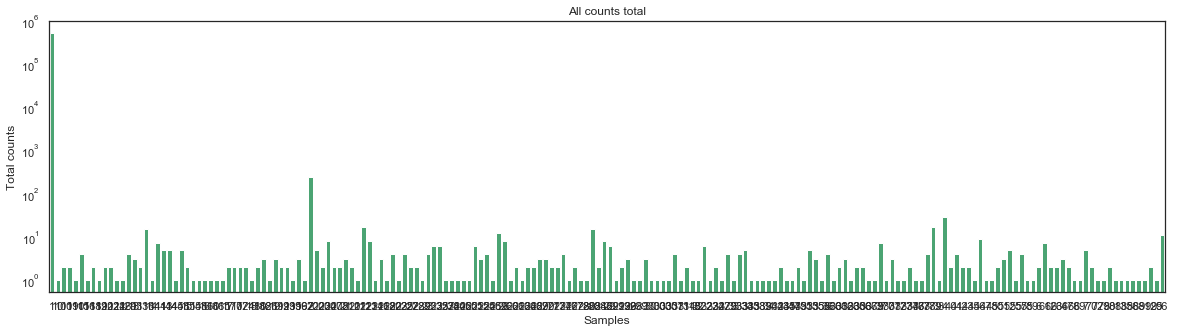

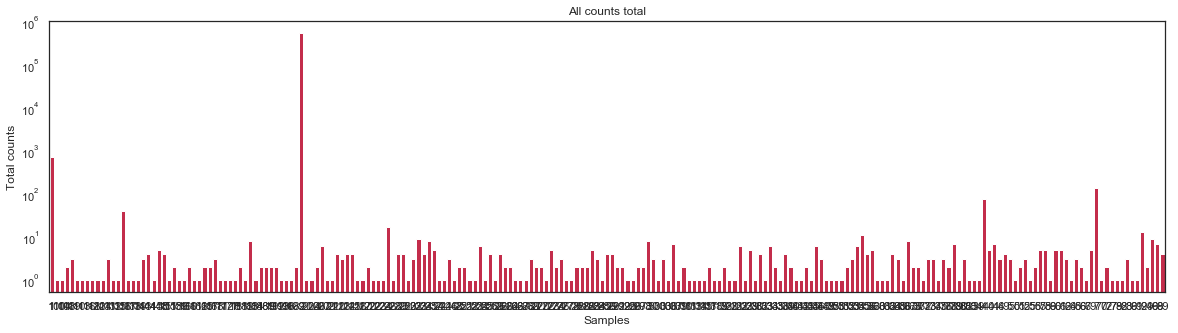

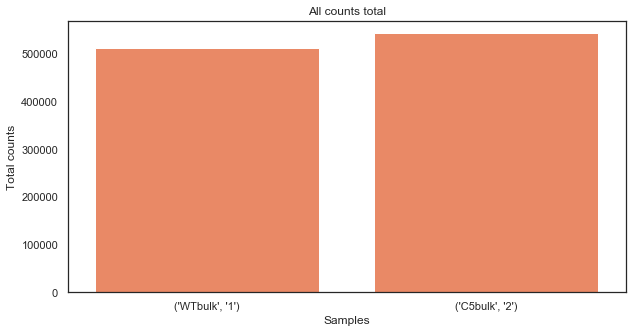

In [8]:
sums_cells_all_WT = WT.sum(axis=0)
sums_cells_all_C5 = C5bulk.sum(axis=0)

#all counts total C5
sns.set(style="white")
plt.figure(figsize=(20,5))
ax = sns.barplot(x=sums_cells_all_WT.index.levels[1], y=sums_cells_all_WT, log='y', color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts total C5
sns.set(style="white")
plt.figure(figsize=(20,5))
ax = sns.barplot(x=sums_cells_all_C5.index.levels[1], y=sums_cells_all_C5, log='y', color='crimson')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#selected
sums_cells_both = data.sum(axis=0)

sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_both.index, y=sums_cells_both,color='coral')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

In [31]:
print (sums_cells_all_WT[0] / sums_cells_all_WT.sum())
print (541563.0 / sums_cells_all_C5.sum())

0.9985027043192876
0.9972323805946238


In [9]:
print(max(sums_cells_all_WT), WT[('WTbulk', '1')].sum())
print(max(sums_cells_all_C5), C5bulk[('C5bulk', '2')].sum())

510823.0 510823.0
541563.0 541563.0


In [10]:
sf = data.loc['12']

sf_129 = sf.loc['129S1_SvImJ']
sf_B6 = sf.loc['C57BL_6NJ']

nonallelic = sf.drop(['C57BL_6NJ','129S1_SvImJ','129S1_SvImJ,C57BL_6NJ'])

indexNonAllelic = nonallelic.index.droplevel(0)
sf_nonallelic = nonallelic.copy()
sf_nonallelic.index = indexNonAllelic

# Plot QC

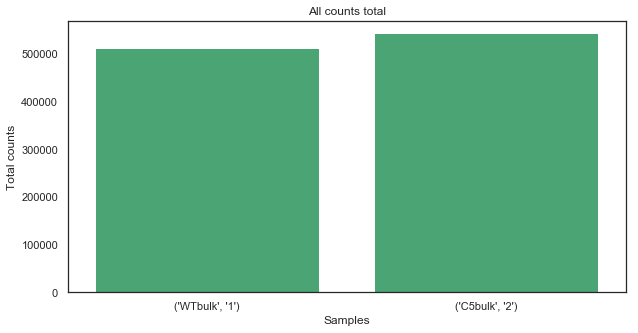

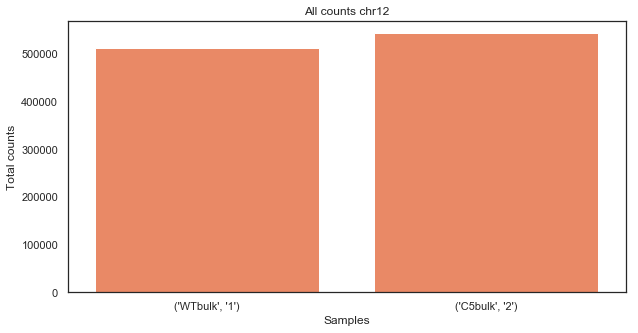

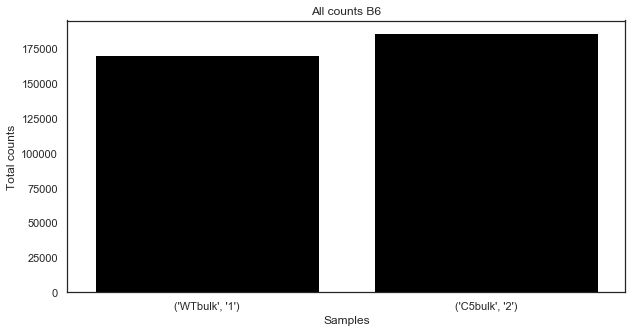

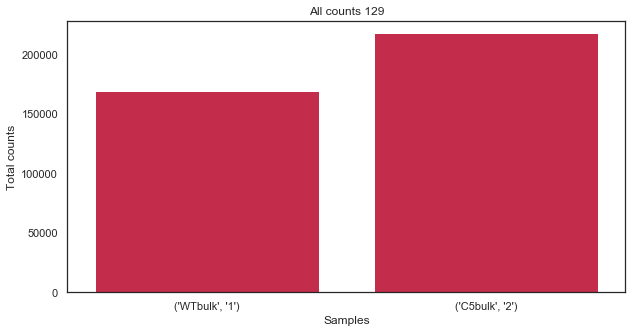

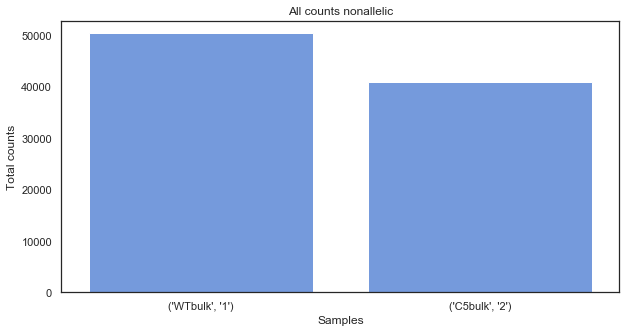

In [13]:
sums_cells_all = data.sum(axis=0)
sums_cells_12 = sf.sum(axis=0)
sums_cells_B6 = sf_B6.sum(axis=0)
sums_cells_129 = sf_129.sum(axis=0)
sums_cells_NA = sf_nonallelic.sum(axis=0)


#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts chromosome 12
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_12.index, y=sums_cells_12, color="coral")
ax.set_title('All counts chr12')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

# all counts per allele
#sf.loc['C57BL_6NJ']
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_B6.index, y=sums_cells_B6, color='black')
ax.set_title('All counts B6')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#sf.loc['129S1_SvImJ'].sum(axis=0)
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_129.index, y=sums_cells_129, color='crimson')
ax.set_title('All counts 129')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_NA.index, y=sums_cells_NA, color='cornflowerblue')
ax.set_title('All counts nonallelic')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

/Users/m.blotenburg/miniconda2/envs/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


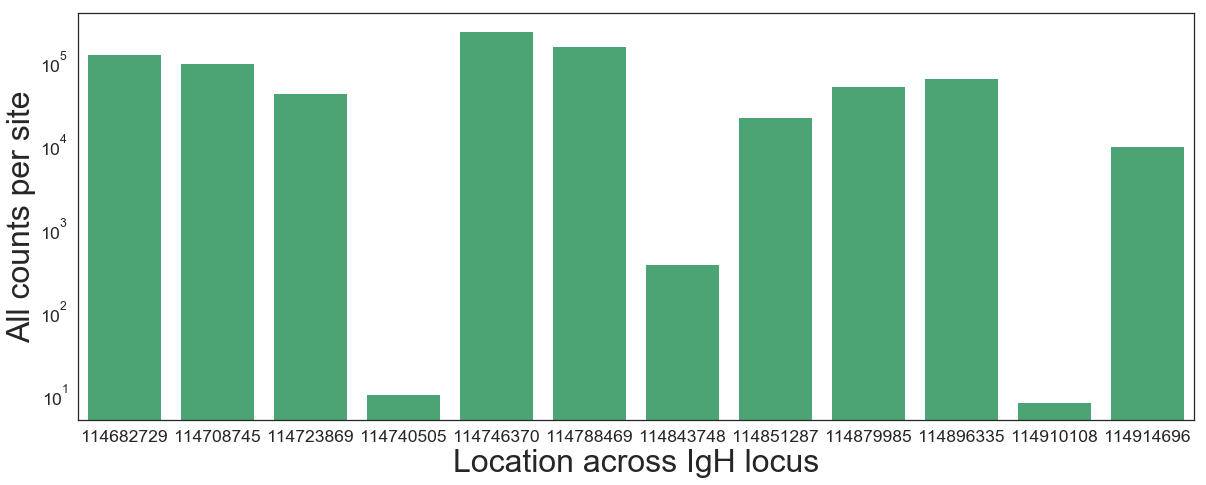

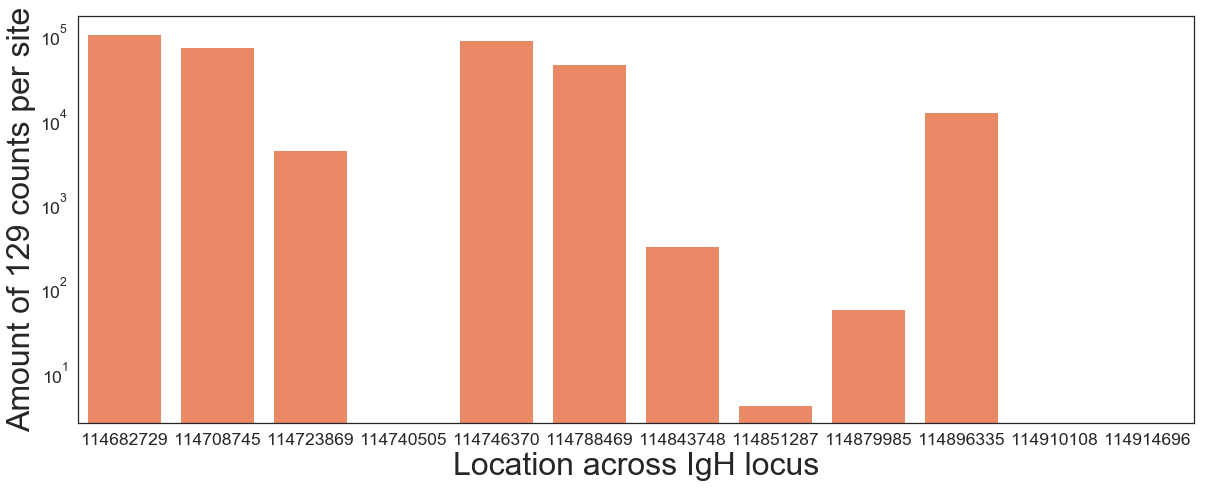

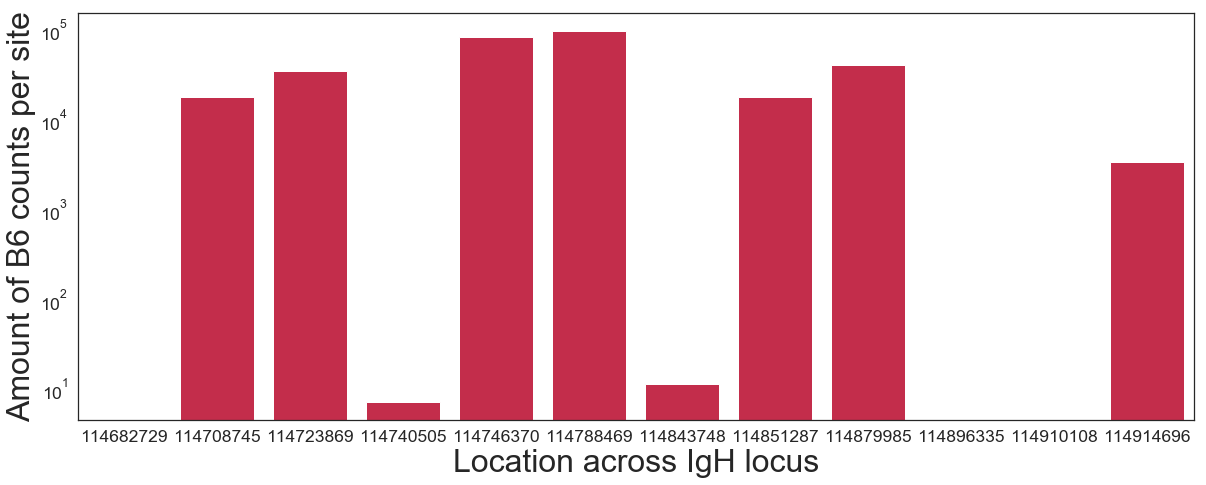

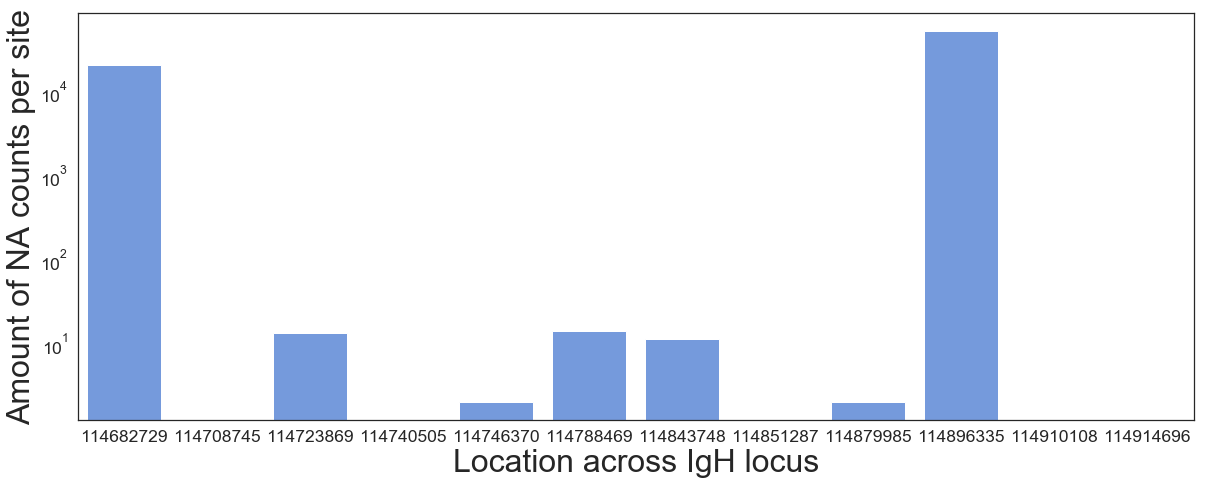

In [12]:
#dropping levels chr12 allele specific
index129 = sf_129.index.droplevel(1)
totalcountspersite_129 = sf_129.copy()
totalcountspersite_129.index = index129
sums_cells_129 = totalcountspersite_129.sum(axis=1)
sums_cells_129_merged = sums_cells_129.groupby('site').sum()

indexB6 = sf_B6.index.droplevel(1)
totalcountspersite_B6 = sf_B6.copy()
totalcountspersite_B6.index = indexB6
sums_cells_B6 = totalcountspersite_B6.sum(axis=1)
sums_cells_B6_merged = sums_cells_B6.groupby('site').sum()

indexNA = sf_nonallelic.index.droplevel(1)
totalcountspersite_NA = sf_nonallelic.copy()
totalcountspersite_NA.index = indexNA
sums_cells_NA = totalcountspersite_NA.sum(axis=1)
sums_cells_NA_merged = sums_cells_NA.groupby('site').sum()

sums_cells_B6_merged = sums_cells_B6_merged[sorted(sums_cells_B6_merged.index)]
sums_cells_B6_merged_pd = pd.DataFrame(sums_cells_B6_merged)
sums_cells_129_merged = sums_cells_129_merged[sorted(sums_cells_129_merged.index)]
sums_cells_129_merged_pd = pd.DataFrame(sums_cells_129_merged)
sums_cells_NA_merged = sums_cells_NA_merged[sorted(sums_cells_NA_merged.index)]
sums_cells_NA_merged_pd = pd.DataFrame(sums_cells_NA_merged)

#B6_129_countspersite = sums_cells_B6_merged_pd.merge(sums_cells_129_merged_pd, on='site')
B6_129_countspersite = pd.concat([sums_cells_B6_merged_pd,sums_cells_129_merged_pd, sums_cells_NA_merged_pd], axis=1, sort=True)
B6_129_countspersite.columns = ['B6', '129', 'NA']
B6_129_countspersite = B6_129_countspersite.fillna(0)

selectedrawcounts = B6_129_countspersite.loc[['114682729','114708745','114723869','114740505','114746370','114788469',
                                              '114843748', '114851287','114879985','114896335','114910108','114914696']]


#all counts per allele
#sns.set(style="white")
#plt.figure(figsize=(5,10))
#ax = sns.barplot(x=B6_129_countspersite.sum(axis=0).index, y=B6_129_countspersite.sum(axis=0), palette="winter")
#ax.set(xlabel='allele', ylabel='total counts')
#plt.show()

#### All counts for scarred sites
indexAllSites12 = sf.index.droplevel(0)
allSites12 = sf.copy()
allSites12.index = indexAllSites12

indexAllSitesChr12 = allSites12.index.droplevel(1)
allSitesChr12 = allSites12.copy()
allSitesChr12.index = indexAllSitesChr12
allSitesChr12

sums_cells_all = allSitesChr12.sum(axis=1)
sums_cells_all
sums_cells_all_merged = sums_cells_all.groupby('site').sum()

sums_cells_all_merged = sums_cells_all_merged[sorted(sums_cells_all_merged.index)]
sums_cells_all_merged_pd = pd.DataFrame(sums_cells_all_merged)

selectedrawcountsforall = sums_cells_all_merged_pd.loc[['114682729','114708745','114723869','114740505','114746370',
                                                        '114788469', '114843748', '114851287','114879985', 
                                                        '114896335','114910108','114914696']]
selectedrawcountsforall.columns = ['All']

sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcountsforall.index, y=selectedrawcountsforall['All'], log='y', palette="winter")
ax = sns.barplot(x=selectedrawcountsforall.index, y=selectedrawcountsforall['All'], log='y', color='mediumseagreen')

plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('All counts per site', fontsize=32)
ax.tick_params(labelsize=17.5)
plt.show()

#### All counts per allele for scarred sites
sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['129'], log='y', palette="rocket")
ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['129'], log='y', color='coral')
ax.tick_params(labelsize=17.5)
plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('Amount of 129 counts per site', fontsize=32)
plt.show()

sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['B6'], log='y', palette="rocket")
ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['B6'], log='y', color='crimson')
ax.tick_params(labelsize=17.5)
plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('Amount of B6 counts per site', fontsize=32)
plt.show()

sns.set(style="white")
plt.figure(figsize=(20,7.5))
#ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['B6'], log='y', palette="rocket")
ax = sns.barplot(x=selectedrawcounts.index, y=selectedrawcounts['NA'], log='y', color='cornflowerblue')
ax.tick_params(labelsize=17.5)
plt.xlabel('Location across IgH locus', fontsize=32); plt.ylabel('Amount of NA counts per site', fontsize=32)
plt.show()

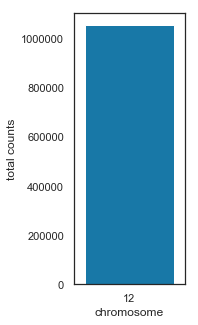

In [14]:
#Plot raw counts per chromosome
sums_cells = data.sum(axis=0, level=0)
countsPerChrom = sums_cells.sum(axis=1)
#selection = countsPerChrom.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
#myorder=[0,11,12,13,14,15,16,17,18,1,2,3,4,5,6,7,8,9,10,19,20,]
#selection.index = [ selection.index[i] for i in myorder]

sns.set(style="white")
plt.figure(figsize=(2,5))
ax = sns.barplot(x=countsPerChrom.index, y=countsPerChrom, palette="winter")
ax.set(xlabel='chromosome', ylabel='total counts')
plt.show()

#sns.set(style="white", font_scale=4)
#plt.figure(figsize=(40,10))
#ax = sns.barplot(x=selection.index, y=selection, palette="winter")
#ax = sns.barplot(x=selection.index, y=selection, color='mediumblue')
#ax.set(xlabel='Chromosome', ylabel='Total counts (x10^7)')
#ax.tick_params(labelsize=17.5)
#plt.xlabel('Chromosome', fontsize=32); plt.ylabel('Total counts', fontsize=32)

plt.show()

# Calculate percentages

In [15]:
sitesB6 = []
sites129 = []
sitesNA = []
for (chrom,allele,site,scar) in data.index:
    if chrom == '12':
        if allele == 'C57BL_6NJ':
            if site not in sitesB6:
                sitesB6.append(site)
        if allele == '129S1_SvImJ':
            if site not in sites129:
                sites129.append(site)
        if allele != 'C57BL_6NJ' and allele != '129S1_SvImJ' and allele !='129S1_SvImJ,C57BL_6NJ' :
            if site not in sitesNA:
                sitesNA.append(site)

In [16]:
#129
sf_129 = sf_129.fillna(0)
cellToSiteToScarPercentage129 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_129.columns:
    for site in sites129:
        if len(sf_129.loc[site])==0:
            continue
        totalReadsForThisSite = sf_129.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_129.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage>0.1:
                cellToSiteToScarPercentage129[sample][int(site)][scar] += percentage

#129
percentagesChrom12 = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)

for sample, allSitesForThisCell in cellToSiteToScarPercentage129.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(500):
            percentagesChrom12[sample][(site,scar)] = percentage

percentagesChr12_129 = pd.DataFrame(percentagesChrom12)


In [17]:
#B6
sf_B6 = sf_B6.fillna(0)
cellToSiteToScarPercentageB6 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_B6.columns:
    for site in sitesB6:
        if len(sf_B6.loc[site])==0:
            continue
        totalReadsForThisSite = sf_B6.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_B6.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage>0.1:
                cellToSiteToScarPercentageB6[sample][int(site)][scar] += percentage


percentagesChr12B6 = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)
for sample, allSitesForThisCell in cellToSiteToScarPercentageB6.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(500):
            percentagesChr12B6[sample][(site,scar)] = percentage

percentagesChr12_B6 = pd.DataFrame(percentagesChr12B6)


In [18]:
#nonallelic
sf_nonallelic = sf_nonallelic.fillna(0)                
cellToSiteToScarPercentageNA = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_nonallelic.columns:
    for site in sitesNA:
        if len(sf_nonallelic.loc[site])==0:
            continue
        totalReadsForThisSite = sf_nonallelic.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_nonallelic.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage>0.1:
                cellToSiteToScarPercentageNA[sample][int(site)][scar] += percentage

percentagesChr12NA = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)
for sample, allSitesForThisCell in cellToSiteToScarPercentageNA.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(500):
            percentagesChr12NA[sample][(site,scar)] = percentage

percentagesChr12_NA = pd.DataFrame(percentagesChr12NA)


# plotting

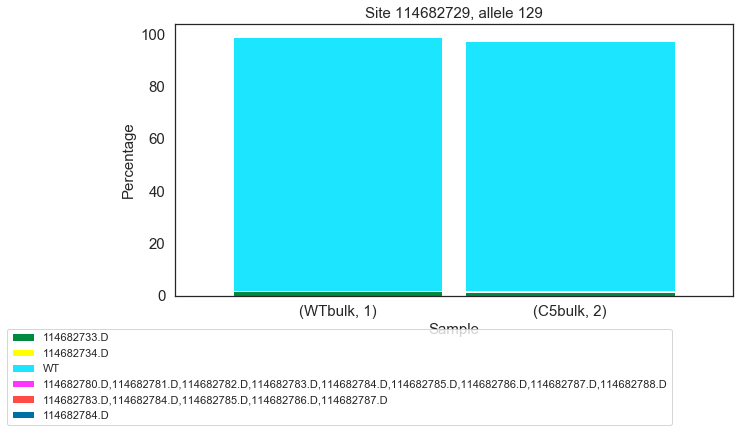

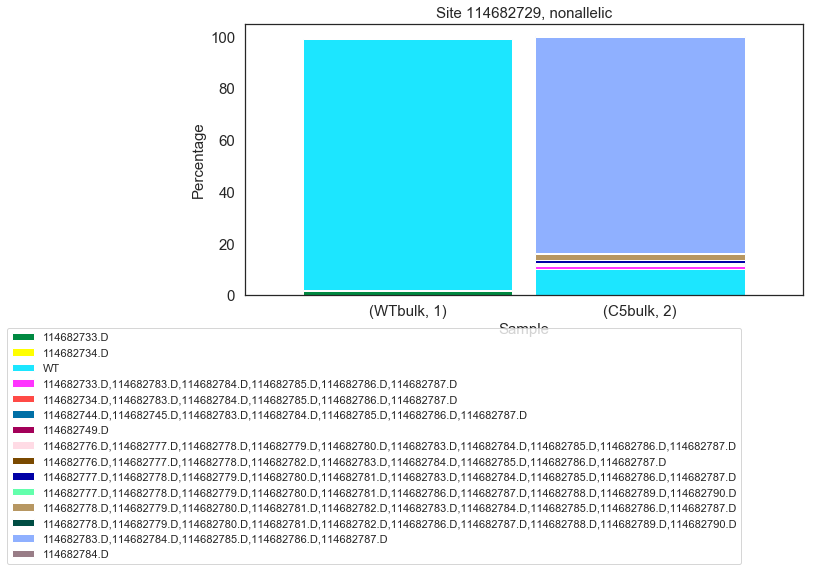

In [37]:
#site 114682729
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114682729].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114682729, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114682729].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114682729, nonallelic', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

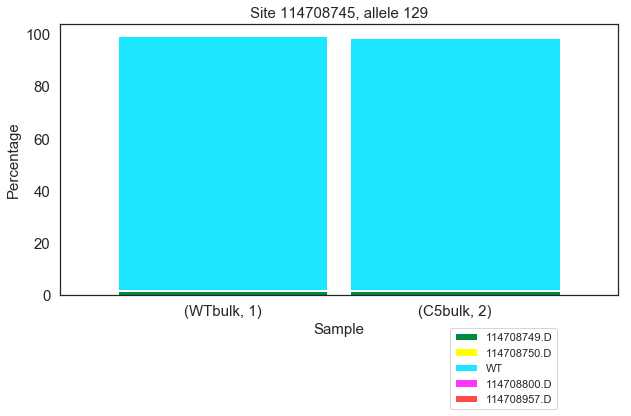

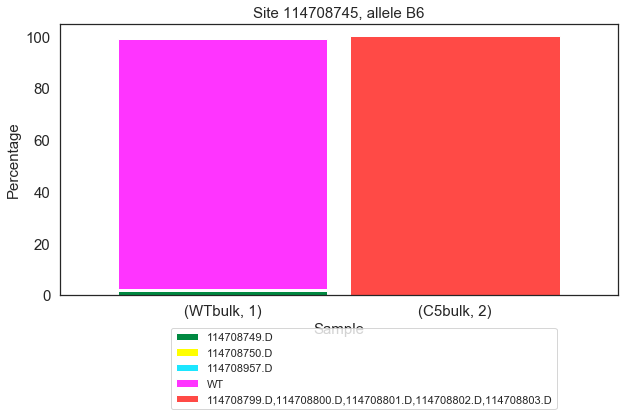

In [63]:
# site 114708745
#site 114682729
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114708745].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114708745, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)


#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114708745].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114708745, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)


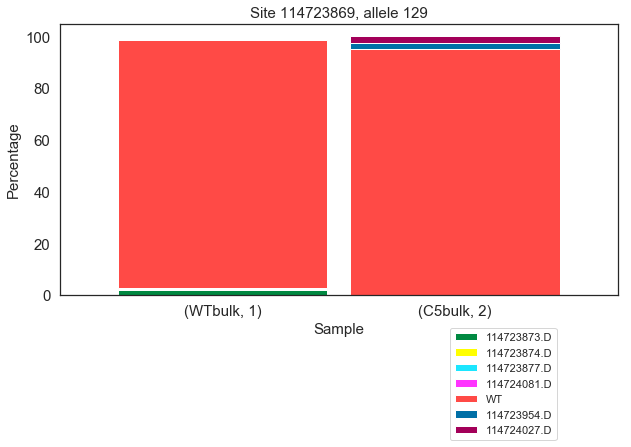

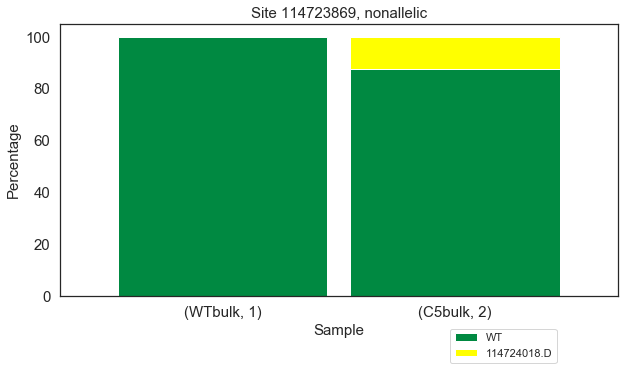

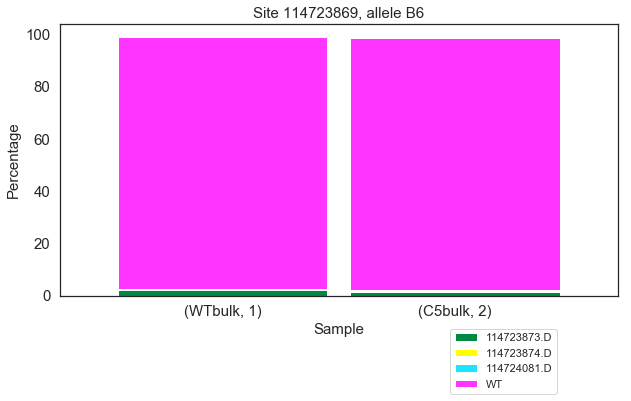

In [39]:
#site 114723869
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114723869].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114723869, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114723869].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114723869, nonallelic', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114723869].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114723869, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)


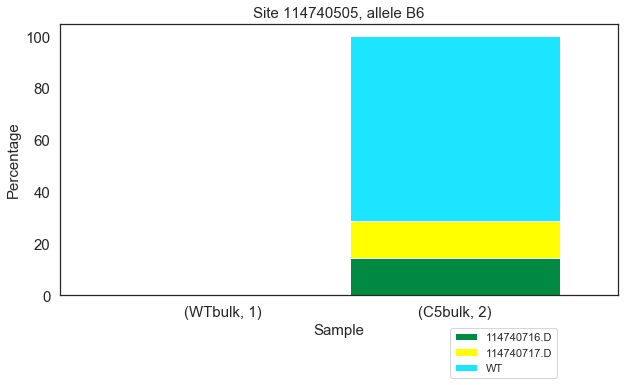

In [42]:
#site 114740505
#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114740505].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114740505, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)


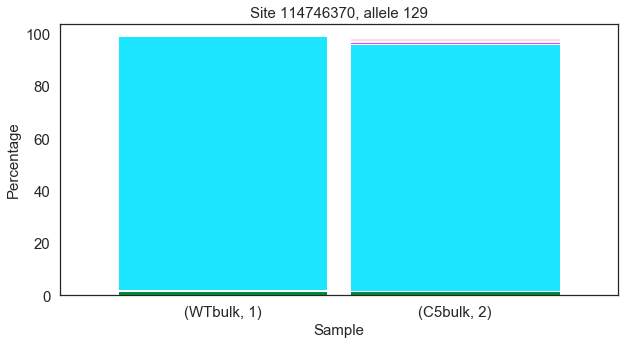

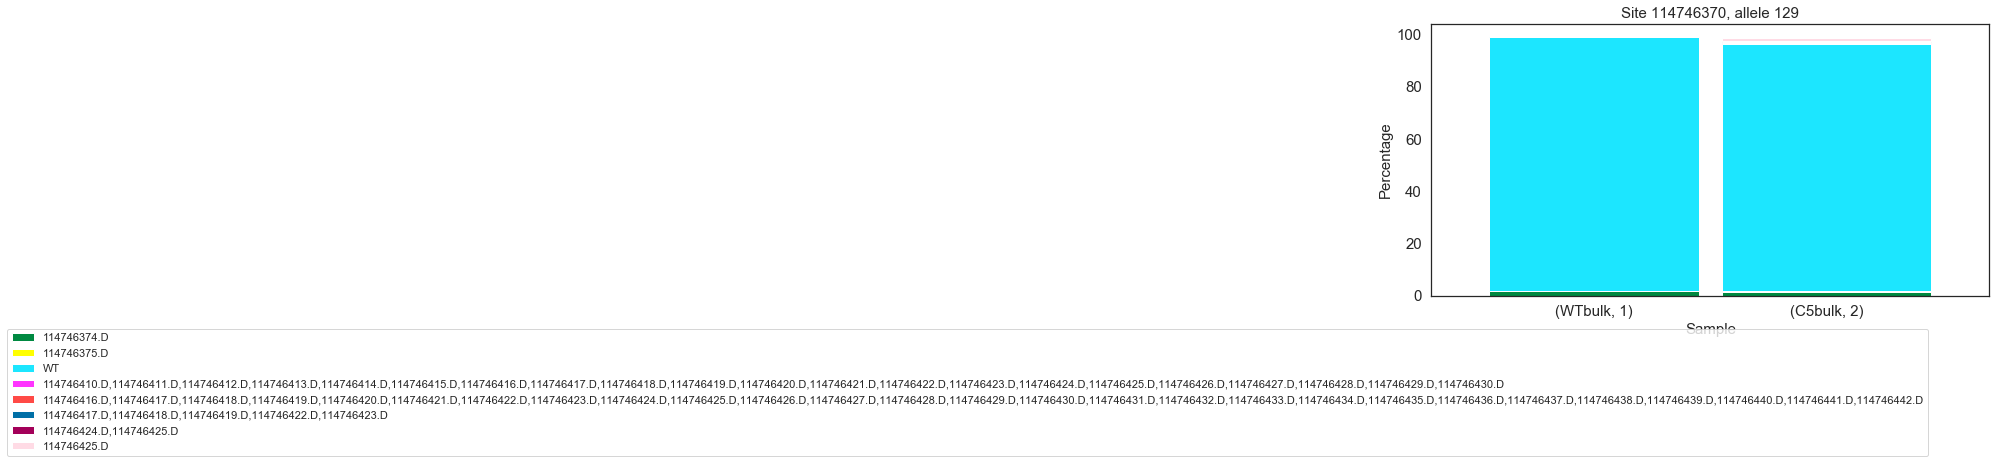

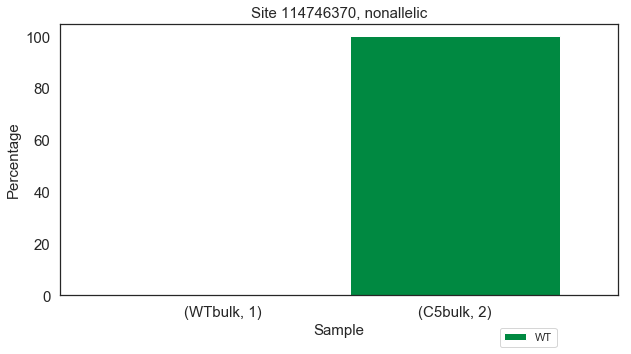

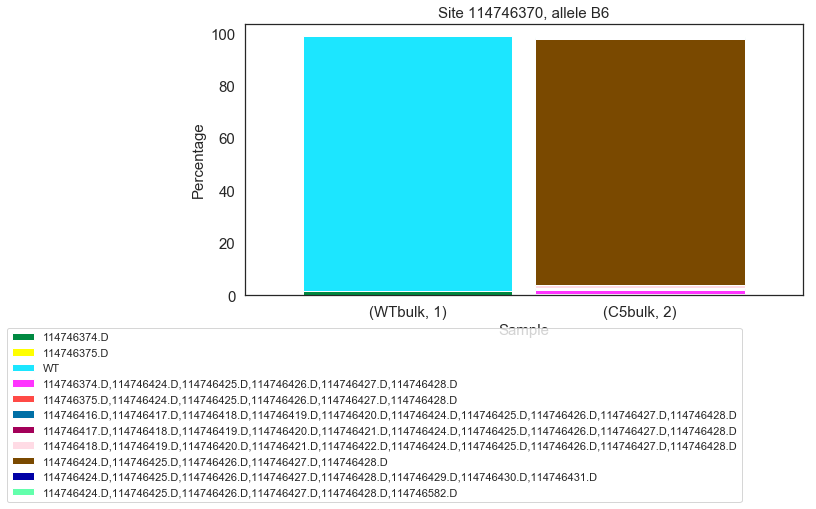

In [44]:
#site 114746370
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114746370].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114746370, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([],frameon=False)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114746370, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114746370].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114746370, nonallelic', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114746370].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114746370, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)


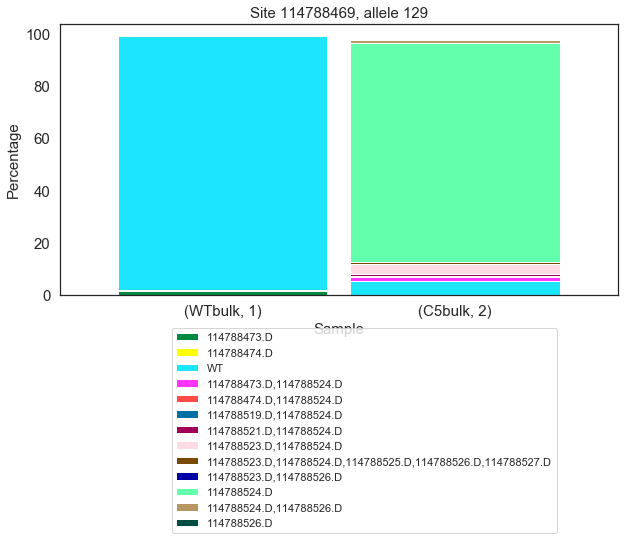

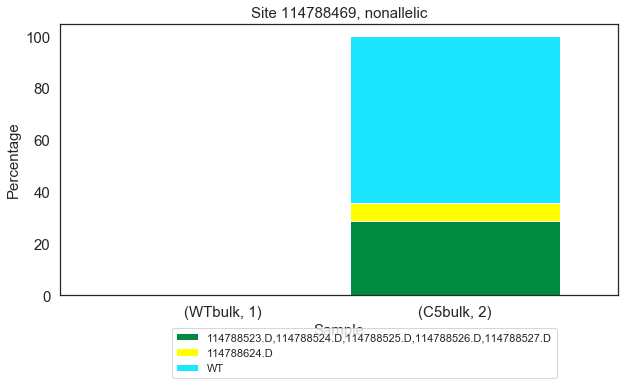

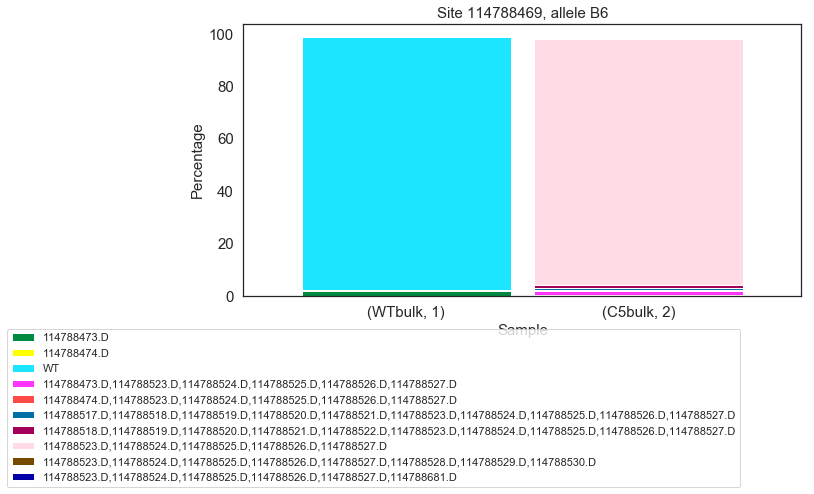

In [45]:
#site 114788469
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114788469].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114788469, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114788469].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114788469, nonallelic', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114788469].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114788469, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)


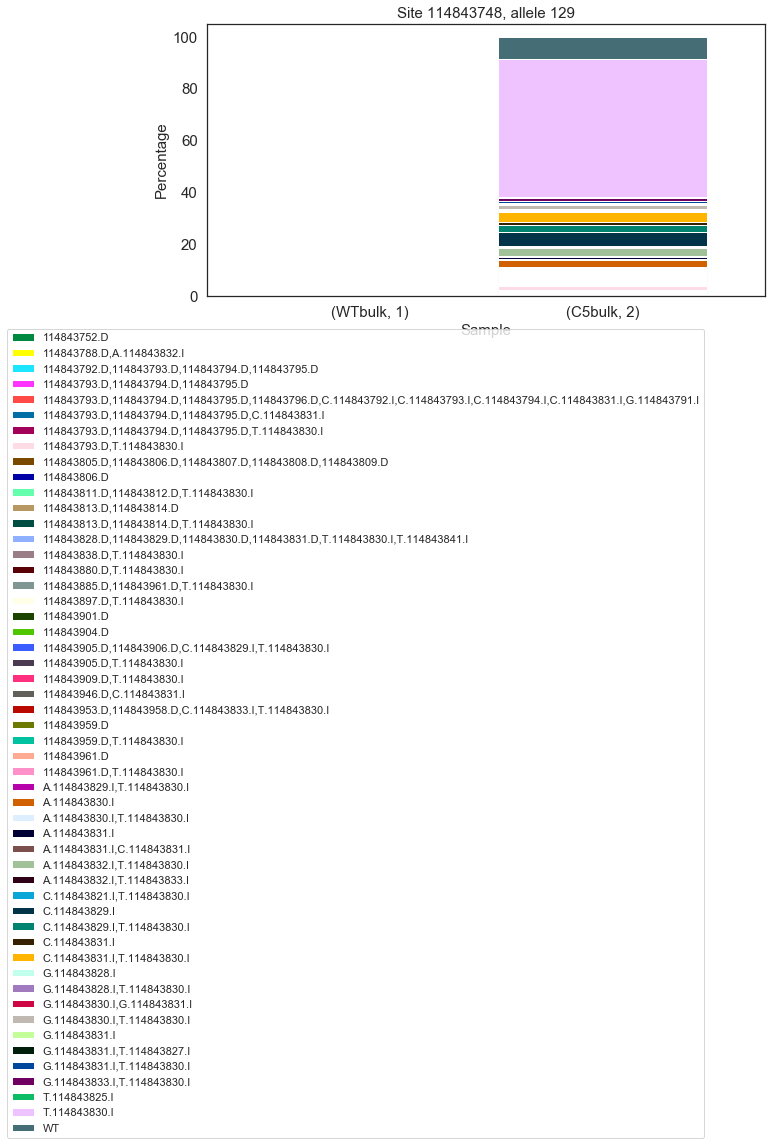

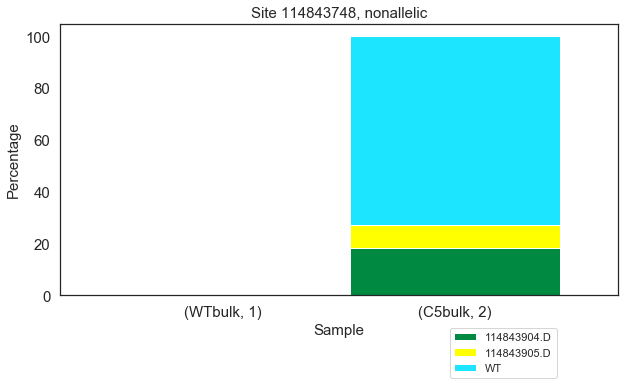

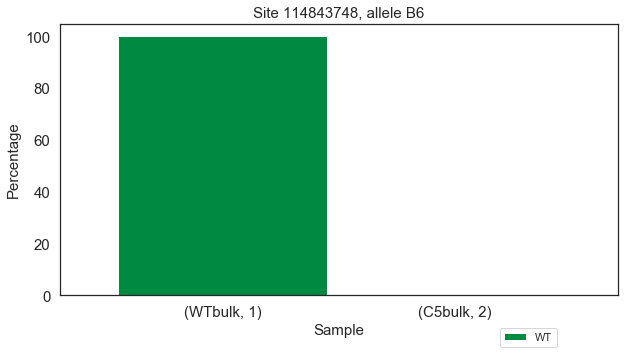

In [46]:
#site 114843748
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114843748].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114843748, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114843748].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114843748, nonallelic', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114843748].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114843748, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)


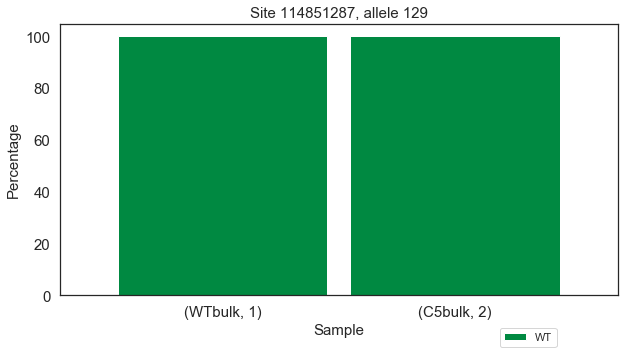

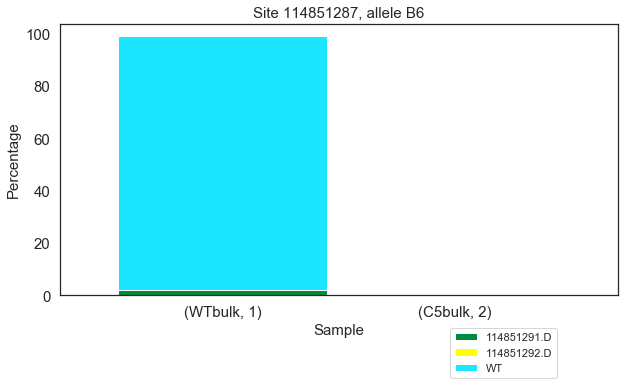

In [48]:
#site 114851287
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114851287].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114851287, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)



#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114851287].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114851287, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)


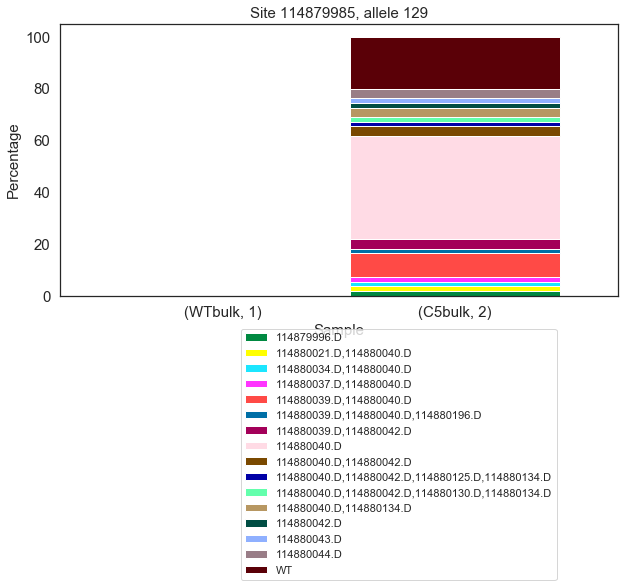

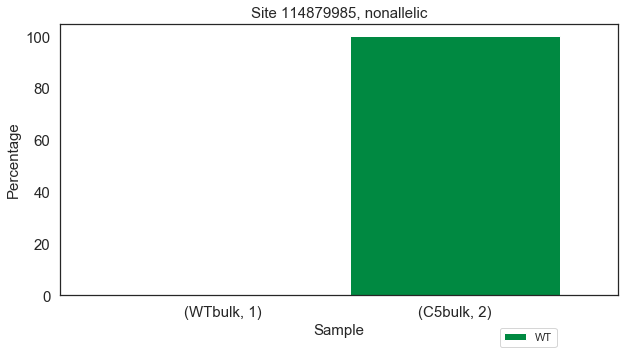

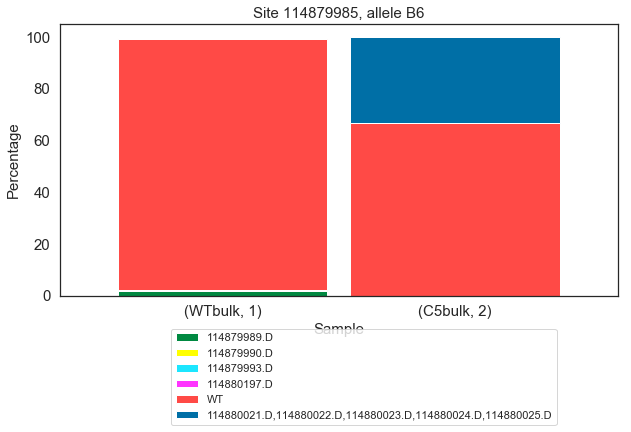

In [49]:
#site 114879985
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114879985].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114879985, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114879985].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114879985, nonallelic', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114879985].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114879985, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)


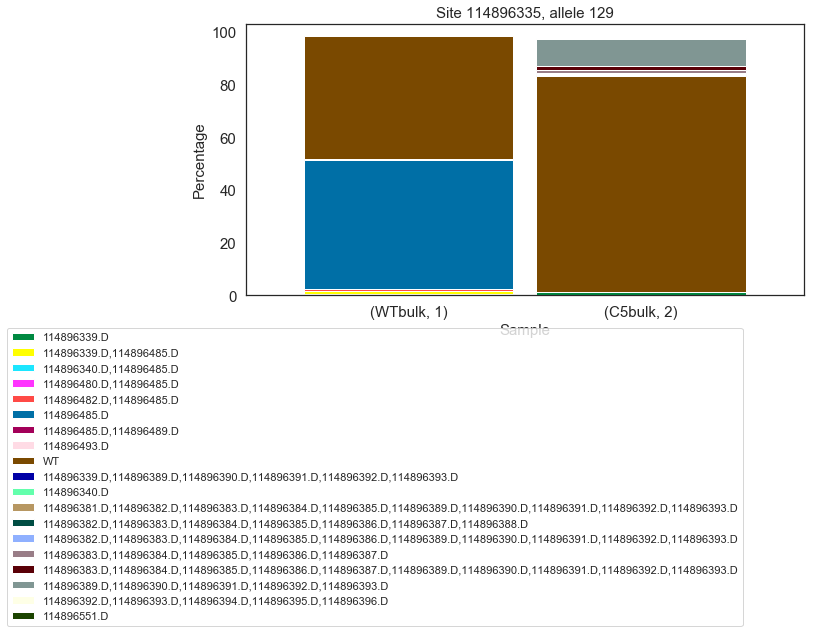

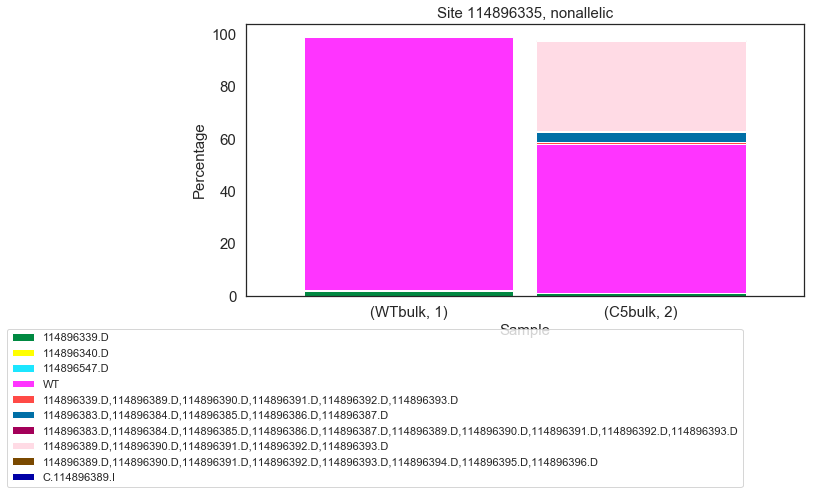

In [51]:
#site 114896335
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114896335].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)

ax = percentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114896335, allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114896335].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)

ax = percentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114896335, nonallelic', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)




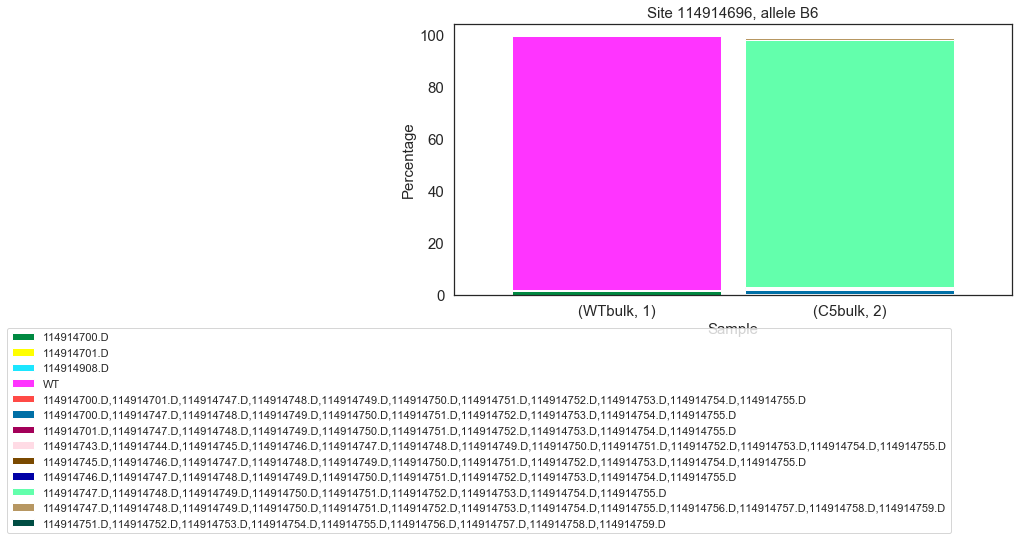

In [65]:
#site 114914696


#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114914696].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)

ax = percentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Sample",fontsize=15)
ax.set_title('Site 114914696, allele B6', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)


In [20]:
#percentagesChr12_129.filter(regex=r'114708745', axis=0)

In [35]:
percentagesChr12_NA.filter(regex=r'1147', axis=0)

WTbulk  \
                                                                  1   
114723869 114724018.D                                           NaN   
          WT                                                  100.0   
114746370 WT                                                    NaN   
114788469 114788523.D,114788524.D,114788525.D,114788526.D...    NaN   
          114788624.D                                           NaN   
          WT                                                    NaN   

                                                                  C5bulk  
                                                                       2  
114723869 114724018.D                                          12.500000  
          WT                                                   87.500000  
114746370 WT                                                  100.000000  
114788469 114788523.D,114788524.D,114788525.D,114788526.D...   28.571429  
          114788624.D                                           7.142857  
          WT                                                   64.285714

In [29]:
cols=["#008941", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#006FA6", "#A30059",
    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
    "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
    "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
    "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
    "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
    "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
    "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
    "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
    "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
    "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
    "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
    "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C",
    "#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800",
    "#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51",
    "#C895C5", "#320033", "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58",
    "#7A7BFF", "#D68E01", "#353339", "#78AFA1", "#FEB2C6", "#75797C", "#837393", "#943A4D",
    "#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176",
    "#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5",
    "#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4",
    "#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01",
    "#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966",
    "#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0",
    "#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C",
    "#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868",
    "#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183",
    "#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433",
    "#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F",
    "#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E",
    "#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F",
    "#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00",
    "#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66",
    "#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25",
    "#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B", "#1E2324", "#DEC9B2", "#9D4948",
    "#85ABB4", "#342142", "#D09685", "#A4ACAC", "#00FFFF", "#AE9C86", "#742A33", "#0E72C5",
    "#AFD8EC", "#C064B9", "#91028C", "#FEEDBF", "#FFB789", "#9CB8E4", "#AFFFD1", "#2A364C",
    "#4F4A43", "#647095", "#34BBFF", "#807781", "#920003", "#B3A5A7", "#018615", "#F1FFC8",
    "#976F5C", "#FF3BC1", "#FF5F6B", "#077D84", "#F56D93", "#5771DA", "#4E1E2A", "#830055",
    "#02D346", "#BE452D", "#00905E", "#BE0028", "#6E96E3", "#007699", "#FEC96D", "#9C6A7D",
    "#3FA1B8", "#893DE3", "#79B4D6", "#7FD4D9", "#6751BB", "#B28D2D", "#E27A05", "#DD9CB8",
    "#AABC7A", "#980034", "#561A02", "#8F7F00", "#635000", "#CD7DAE", "#8A5E2D", "#FFB3E1",
    "#6B6466", "#C6D300", "#0100E2", "#88EC69", "#8FCCBE", "#21001C", "#511F4D", "#E3F6E3",
    "#FF8EB1", "#6B4F29", "#A37F46", "#6A5950", "#1F2A1A", "#04784D", "#101835", "#E6E0D0",
    "#FF74FE", "#00A45F", "#8F5DF8", "#4B0059", "#412F23", "#D8939E", "#DB9D72", "#604143",
    "#B5BACE", "#989EB7", "#D2C4DB", "#A587AF", "#77D796", "#7F8C94", "#FF9B03", "#555196",
    "#31DDAE", "#74B671", "#802647", "#2A373F", "#014A68", "#696628", "#4C7B6D", "#002C27",
    "#7A4522", "#3B5859", "#E5D381", "#FFF3FF", "#679FA0", "#261300", "#2C5742", "#9131AF",
    "#AF5D88", "#C7706A", "#61AB1F", "#8CF2D4", "#C5D9B8", "#9FFFFB", "#BF45CC", "#493941",
    "#863B60", "#B90076", "#003177", "#C582D2", "#C1B394", "#602B70", "#887868", "#BABFB0",
    "#030012", "#D1ACFE", "#7FDEFE", "#4B5C71", "#A3A097", "#E66D53", "#637B5D", "#92BEA5",
    "#00F8B3", "#BEDDFF", "#3DB5A7", "#DD3248", "#B6E4DE", "#427745", "#598C5A", "#B94C59",
    "#8181D5", "#94888B", "#FED6BD", "#536D31", "#6EFF92", "#E4E8FF", "#20E200", "#FFD0F2",
    "#4C83A1", "#BD7322", "#915C4E", "#8C4787", "#025117", "#A2AA45", "#2D1B21", "#A9DDB0",
    "#FF4F78", "#528500", "#009A2E", "#17FCE4", "#71555A", "#525D82", "#00195A", "#967874",
    "#555558", "#0B212C", "#1E202B", "#EFBFC4", "#6F9755", "#6F7586", "#501D1D", "#372D00",
    "#741D16", "#5EB393", "#B5B400", "#DD4A38", "#363DFF", "#AD6552", "#6635AF", "#836BBA",
    "#98AA7F", "#464836", "#322C3E", "#7CB9BA", "#5B6965", "#707D3D", "#7A001D", "#6E4636",
    "#443A38", "#AE81FF", "#489079", "#897334", "#009087", "#DA713C", "#361618", "#FF6F01",
    "#006679", "#370E77", "#4B3A83", "#C9E2E6", "#C44170", "#FF4526", "#73BE54", "#C4DF72",
    "#ADFF60", "#00447D", "#DCCEC9", "#BD9479", "#656E5B", "#EC5200", "#FF6EC2", "#7A617E",
    "#DDAEA2", "#77837F", "#A53327", "#608EFF", "#B599D7", "#A50149", "#4E0025", "#C9B1A9",
    "#03919A", "#1B2A25", "#E500F1", "#982E0B", "#B67180", "#E05859", "#006039", "#578F9B",
    "#305230", "#CE934C", "#B3C2BE", "#C0BAC0", "#B506D3", "#170C10", "#4C534F", "#224451",
    "#3E4141", "#78726D", "#B6602B", "#200441", "#DDB588", "#497200", "#C5AAB6", "#033C61",
    "#71B2F5", "#A9E088", "#4979B0", "#A2C3DF", "#784149", "#2D2B17", "#3E0E2F", "#57344C",
    "#0091BE", "#E451D1", "#4B4B6A", "#5C011A", "#7C8060", "#FF9491", "#4C325D", "#005C8B",
    "#E5FDA4", "#68D1B6", "#032641", "#140023", "#8683A9", "#CFFF00", "#A72C3E", "#34475A",
    "#B1BB9A", "#B4A04F", "#8D918E", "#A168A6", "#813D3A", "#425218", "#DA8386", "#776133",
    "#563930", "#8498AE", "#90C1D3", "#B5666B", "#9B585E", "#856465", "#AD7C90", "#E2BC00",
    "#E3AAE0", "#B2C2FE", "#FD0039", "#009B75", "#FFF46D", "#E87EAC", "#DFE3E6", "#848590",
    "#AA9297", "#83A193", "#577977", "#3E7158", "#C64289", "#EA0072", "#C4A8CB", "#55C899",
    "#E78FCF", "#004547", "#F6E2E3", "#966716", "#378FDB", "#435E6A", "#DA0004", "#1B000F",
    "#5B9C8F", "#6E2B52", "#011115", "#E3E8C4", "#AE3B85", "#EA1CA9", "#FF9E6B", "#457D8B",
    "#92678B", "#00CDBB", "#9CCC04", "#002E38", "#96C57F", "#CFF6B4", "#492818", "#766E52",
    "#20370E", "#E3D19F", "#2E3C30", "#B2EACE", "#F3BDA4", "#A24E3D", "#976FD9", "#8C9FA8",
    "#7C2B73", "#4E5F37", "#5D5462", "#90956F", "#6AA776", "#DBCBF6", "#DA71FF", "#987C95",
    "#52323C", "#BB3C42", "#584D39", "#4FC15F", "#A2B9C1", "#79DB21", "#1D5958", "#BD744E",
    "#160B00", "#20221A", "#6B8295", "#00E0E4", "#102401", "#1B782A", "#DAA9B5", "#B0415D",
    "#859253", "#97A094", "#06E3C4", "#47688C", "#7C6755", "#075C00", "#7560D5", "#7D9F00",
    "#C36D96", "#4D913E", "#5F4276", "#FCE4C8", "#303052", "#4F381B", "#E5A532", "#706690",
    "#AA9A92", "#237363", "#73013E", "#FF9079", "#A79A74", "#029BDB", "#FF0169", "#C7D2E7",
    "#CA8869", "#80FFCD", "#BB1F69", "#90B0AB", "#7D74A9", "#FCC7DB", "#99375B", "#00AB4D",
    "#ABAED1", "#BE9D91", "#E6E5A7", "#332C22", "#DD587B", "#F5FFF7", "#5D3033", "#6D3800",
    "#FF0020", "#B57BB3", "#D7FFE6", "#C535A9", "#260009", "#6A8781", "#A8ABB4", "#D45262",
    "#794B61", "#4621B2", "#8DA4DB", "#C7C890", "#6FE9AD", "#A243A7", "#B2B081", "#181B00",
    "#286154", "#4CA43B", "#6A9573", "#A8441D", "#5C727B", "#738671", "#D0CFCB", "#897B77",
    "#1F3F22", "#4145A7", "#DA9894", "#A1757A", "#63243C", "#ADAAFF", "#00CDE2", "#DDBC62",
    "#698EB1", "#208462", "#00B7E0", "#614A44", "#9BBB57", "#7A5C54", "#857A50", "#766B7E",
    "#014833", "#FF8347", "#7A8EBA", "#274740", "#946444", "#EBD8E6", "#646241", "#373917",
    "#6AD450", "#81817B", "#D499E3", "#979440", "#011A12", "#526554", "#B5885C", "#A499A5",
    "#03AD89", "#B3008B", "#E3C4B5", "#96531F", "#867175", "#74569E", "#617D9F", "#E70452",
    "#067EAF", "#A697B6", "#B787A8", "#9CFF93", "#311D19", "#3A9459", "#6E746E", "#B0C5AE",
    "#84EDF7", "#ED3488", "#754C78", "#384644", "#C7847B", "#00B6C5", "#7FA670", "#C1AF9E",
    "#2A7FFF", "#72A58C", "#FFC07F", "#9DEBDD", "#D97C8E", "#7E7C93", "#62E674", "#B5639E",
    "#FFA861", "#C2A580", "#8D9C83", "#B70546", "#372B2E", "#0098FF", "#985975", "#20204C",
    "#FF6C60", "#445083", "#8502AA", "#72361F", "#9676A3", "#484449", "#CED6C2", "#3B164A",
    "#CCA763", "#2C7F77", "#02227B", "#A37E6F", "#CDE6DC", "#CDFFFB", "#BE811A", "#F77183",
    "#EDE6E2", "#CDC6B4", "#FFE09E", "#3A7271", "#FF7B59", "#4E4E01", "#4AC684", "#8BC891",
    "#BC8A96", "#CF6353", "#DCDE5C", "#5EAADD", "#F6A0AD", "#E269AA", "#A3DAE4", "#436E83",
    "#002E17", "#ECFBFF", "#A1C2B6", "#50003F", "#71695B", "#67C4BB", "#536EFF", "#5D5A48",
    "#890039", "#969381", "#371521", "#5E4665", "#AA62C3", "#8D6F81", "#2C6135", "#410601",
    "#564620", "#E69034", "#6DA6BD", "#E58E56", "#E3A68B", "#48B176", "#D27D67", "#B5B268",
    "#7F8427", "#FF84E6", "#435740", "#EAE408", "#F4F5FF", "#325800", "#4B6BA5", "#ADCEFF",
    "#9B8ACC", "#885138", "#5875C1", "#7E7311", "#FEA5CA", "#9F8B5B", "#A55B54", "#89006A",
    "#AF756F", "#2A2000", "#7499A1", "#FFB550", "#00011E", "#D1511C", "#688151", "#BC908A",
    "#78C8EB", "#8502FF", "#483D30", "#C42221", "#5EA7FF", "#785715", "#0CEA91", "#FFFAED",
    "#B3AF9D", "#3E3D52", "#5A9BC2", "#9C2F90", "#8D5700", "#ADD79C", "#00768B", "#337D00",
    "#C59700", "#3156DC", "#944575", "#ECFFDC", "#D24CB2", "#97703C", "#4C257F", "#9E0366",
    "#88FFEC", "#B56481", "#396D2B", "#56735F", "#988376", "#9BB195", "#A9795C", "#E4C5D3",
    "#9F4F67", "#1E2B39", "#664327", "#AFCE78", "#322EDF", "#86B487", "#C23000", "#ABE86B",
    "#96656D", "#250E35", "#A60019", "#0080CF", "#CAEFFF", "#323F61", "#A449DC", "#6A9D3B",
    "#FF5AE4", "#636A01", "#D16CDA", "#736060", "#FFBAAD", "#D369B4", "#FFDED6", "#6C6D74",
    "#927D5E", "#845D70", "#5B62C1", "#2F4A36", "#E45F35", "#FF3B53", "#AC84DD", "#762988",
    "#70EC98", "#408543", "#2C3533", "#2E182D", "#323925", "#19181B", "#2F2E2C", "#023C32",
    "#9B9EE2", "#58AFAD", "#5C424D", "#7AC5A6", "#685D75", "#B9BCBD", "#834357", "#1A7B42",
    "#2E57AA", "#E55199", "#316E47", "#CD00C5", "#6A004D", "#7FBBEC", "#F35691", "#D7C54A",
    "#62ACB7", "#CBA1BC", "#A28A9A", "#6C3F3B", "#FFE47D", "#DCBAE3", "#5F816D", "#3A404A",
    "#7DBF32", "#E6ECDC", "#852C19", "#285366", "#B8CB9C", "#0E0D00", "#4B5D56", "#6B543F",
    "#E27172", "#0568EC", "#2EB500", "#D21656", "#EFAFFF", "#682021", "#2D2011", "#DA4CFF",
    "#70968E", "#FF7B7D", "#4A1930", "#E8C282", "#E7DBBC", "#A68486", "#1F263C", "#36574E",
    "#52CE79", "#ADAAA9", "#8A9F45", "#6542D2", "#00FB8C", "#5D697B", "#CCD27F", "#94A5A1",
    "#790229", "#E383E6", "#7EA4C1", "#4E4452", "#4B2C00", "#620B70", "#314C1E", "#874AA6",
    "#E30091", "#66460A", "#EB9A8B", "#EAC3A3", "#98EAB3", "#AB9180", "#B8552F", "#1A2B2F",
    "#94DDC5", "#9D8C76", "#9C8333", "#94A9C9", "#392935", "#8C675E", "#CCE93A", "#917100",
    "#01400B", "#449896", "#1CA370", "#E08DA7", "#8B4A4E", "#667776", "#4692AD", "#67BDA8",
    "#69255C", "#D3BFFF", "#4A5132", "#7E9285", "#77733C", "#E7A0CC", "#51A288", "#2C656A",
    "#4D5C5E", "#C9403A", "#DDD7F3", "#005844", "#B4A200", "#488F69", "#858182", "#D4E9B9",
    "#3D7397", "#CAE8CE", "#D60034", "#AA6746", "#9E5585", "#BA6200"]
